OpenCV Introduction

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1300, 1950, 3)


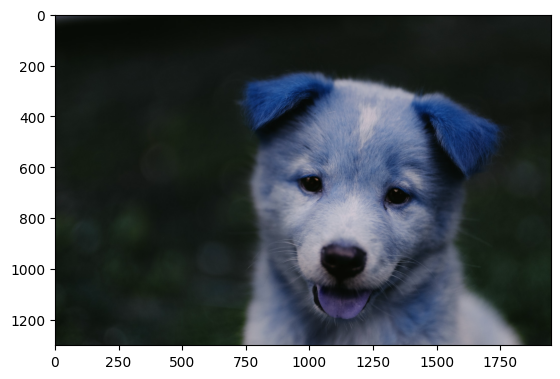

In [31]:
img_src = cv2.imread("00-puppy.jpg", cv2.IMREAD_UNCHANGED)
print(img_src.shape)
plt.imshow(img_src)

(1300, 1950, 3)


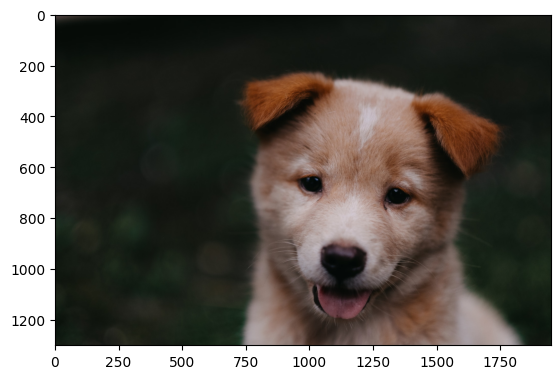

In [33]:
rgb_img = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
# Black not shown correctly in PyCharm... but it's correct in Jupyter Notebook
print(rgb_img.shape)
plt.imshow(rgb_img)

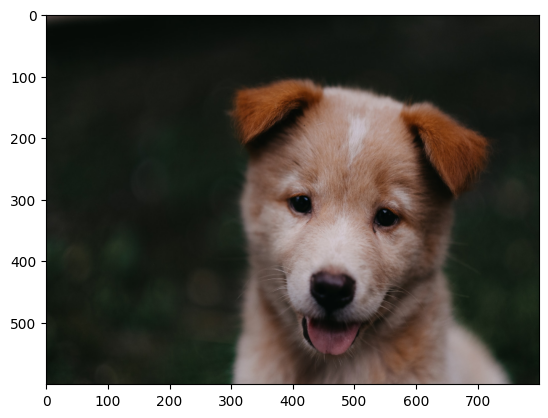

In [18]:
# Resize by pixel
new_img = cv2.resize(rgb_img, (800, 600))
plt.imshow(new_img)

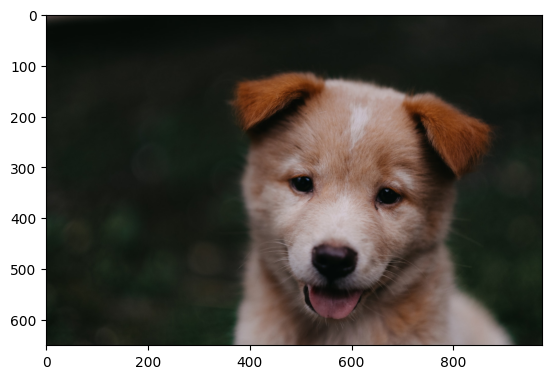

In [20]:
# Resize by ratio
w_ratio = 0.5
h_ratio = 0.5

new_img_ratio = cv2.resize(rgb_img, (0,0), rgb_img, w_ratio, h_ratio)
plt.imshow(new_img_ratio)

In [ ]:
# Save example here. todo

In [53]:
# Create a new image here w blank canvas
blank_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)

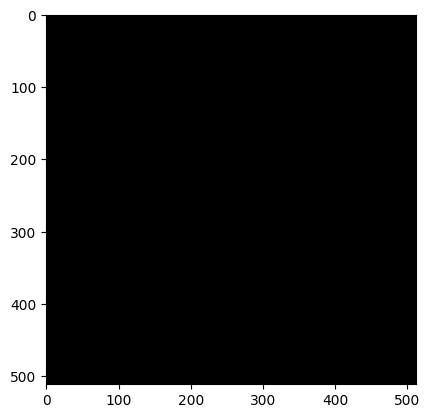

In [54]:
plt.imshow(blank_img)

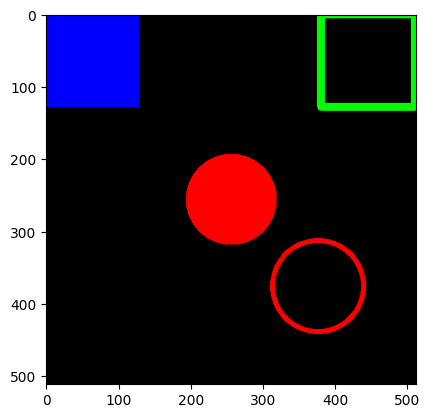

In [55]:
# Rectangle
cv2.rectangle(blank_img, pt1=(380, 0), pt2=(510, 128), color=(0, 255, 0), thickness=10)
cv2.rectangle(blank_img, pt1=(0, 0), pt2=(128, 128), color=(0, 0, 255), thickness=-1)
cv2.circle(blank_img, center=(256, 256), radius=63, color=(255, 0, 0), thickness=-1)
cv2.circle(blank_img, center=(376, 376), radius=63, color=(255, 0, 0), thickness=5)
plt.imshow(blank_img)

# Blending images

(1401, 934, 3)
(1280, 1277, 3)


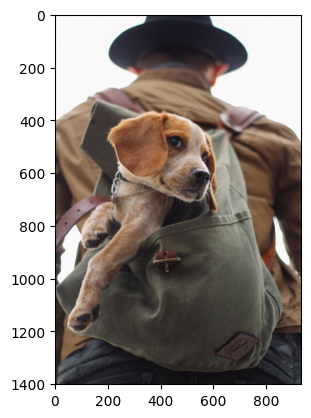

In [77]:
dog = cv2.cvtColor(cv2.imread("dog_backpack.png"), cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(cv2.imread("watermark_no_copy.png", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
print(dog.shape)
print(watermark.shape)
plt.imshow(dog)

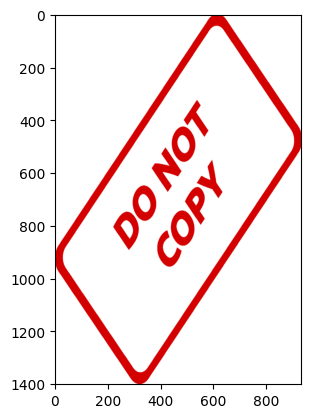

In [81]:
watermark_scaled = cv2.resize(watermark, (934, 1401), watermark, 0, 0)
plt.imshow(watermark_scaled)

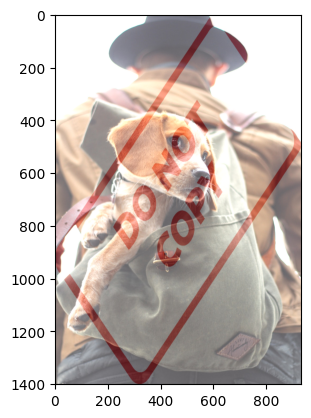

In [75]:
# Blend images of same size
blended = cv2.addWeighted(src1=dog, alpha=1, src2=watermark_scaled, beta=0.3, gamma=10)
plt.imshow(blended)

# Image thresholding

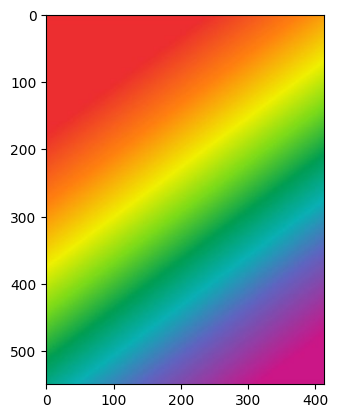

In [85]:
# Color gradients are expensive to process
rainbow = cv2.cvtColor(cv2.imread("rainbow.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(rainbow)

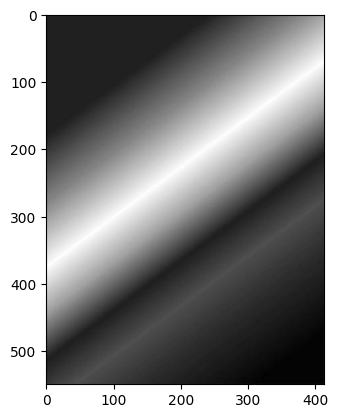

In [87]:
# Grayscale is simpler
rainbow_gs = cv2.imread("rainbow.jpg", 0)
plt.imshow(rainbow_gs, cmap="gray")

In [93]:
print(rainbow_gs.min()," ",rainbow_gs.max())

87   214


In [98]:
# Threshold binary
ret, thresh_1 = cv2.threshold(rainbow_gs, 127, 214, cv2.THRESH_BINARY)

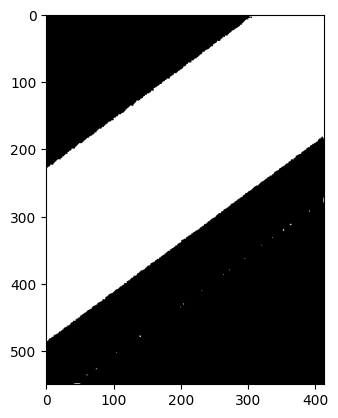

In [99]:
plt.imshow(thresh_1, cmap="gray")

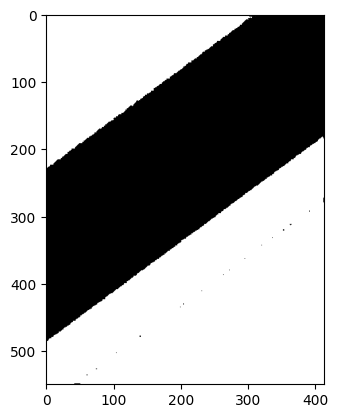

In [100]:
# Threshold binary inverse
ret, thresh_2 = cv2.threshold(rainbow_gs, 127, 214, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_2, cmap="gray")

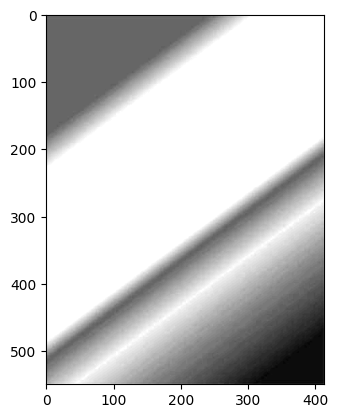

In [101]:
 # Truncate
ret, thresh_3 = cv2.threshold(rainbow_gs, 127, 214, cv2.THRESH_TRUNC)
plt.imshow(thresh_3, cmap="gray")

In [103]:
# Crossword lab
crossword =  cv2.imread("crossword.jpg", 0)
crossword.shape

(839, 532)

In [105]:
def show_pic(img):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

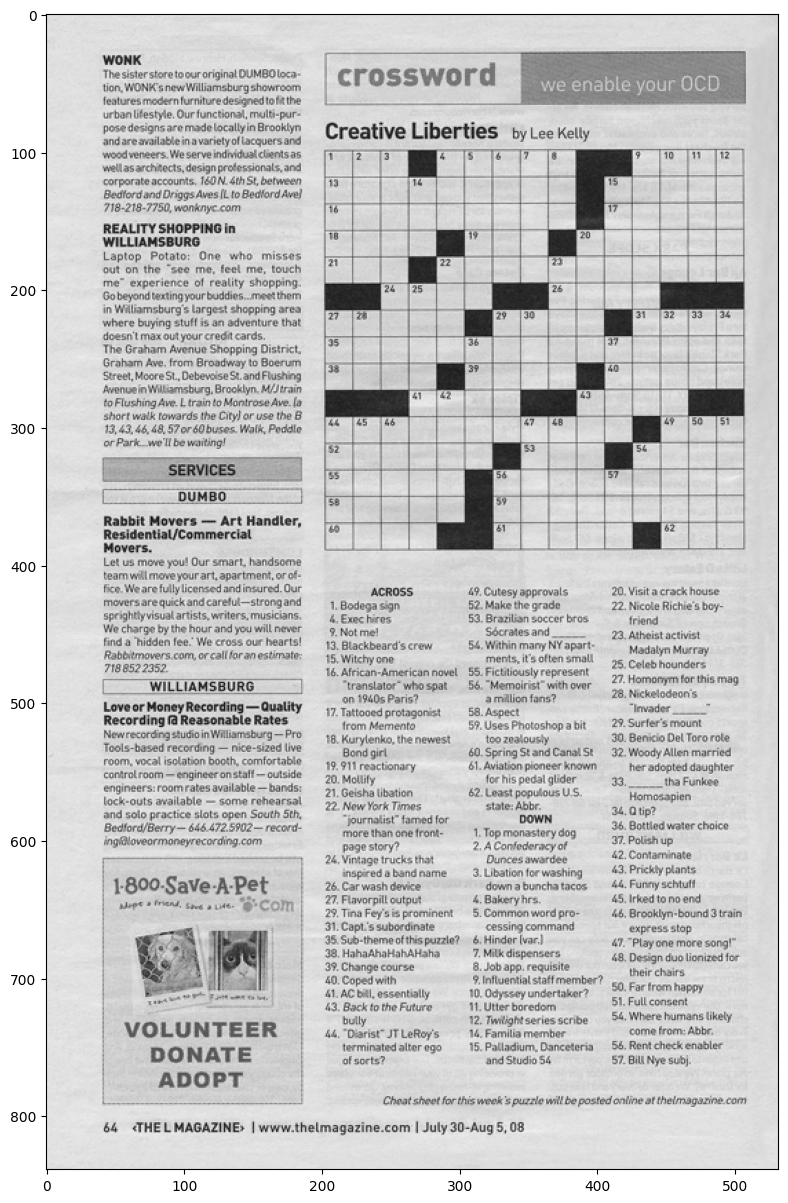

In [106]:
show_pic(crossword)

In [107]:
# Binary threshold
print(crossword.min()," ",crossword.max())

0   255


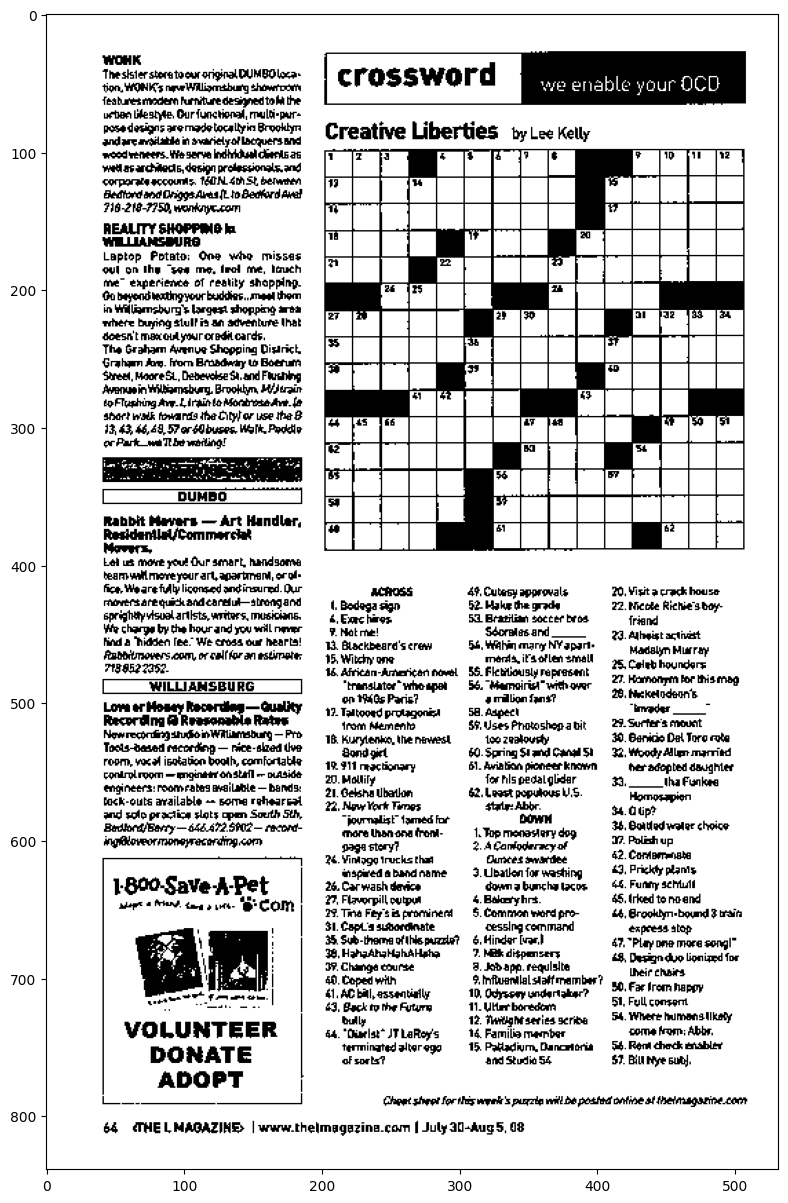

In [113]:
ret, cw_1 = cv2.threshold(crossword, 177, 255, cv2.THRESH_BINARY)
show_pic(cw_1)

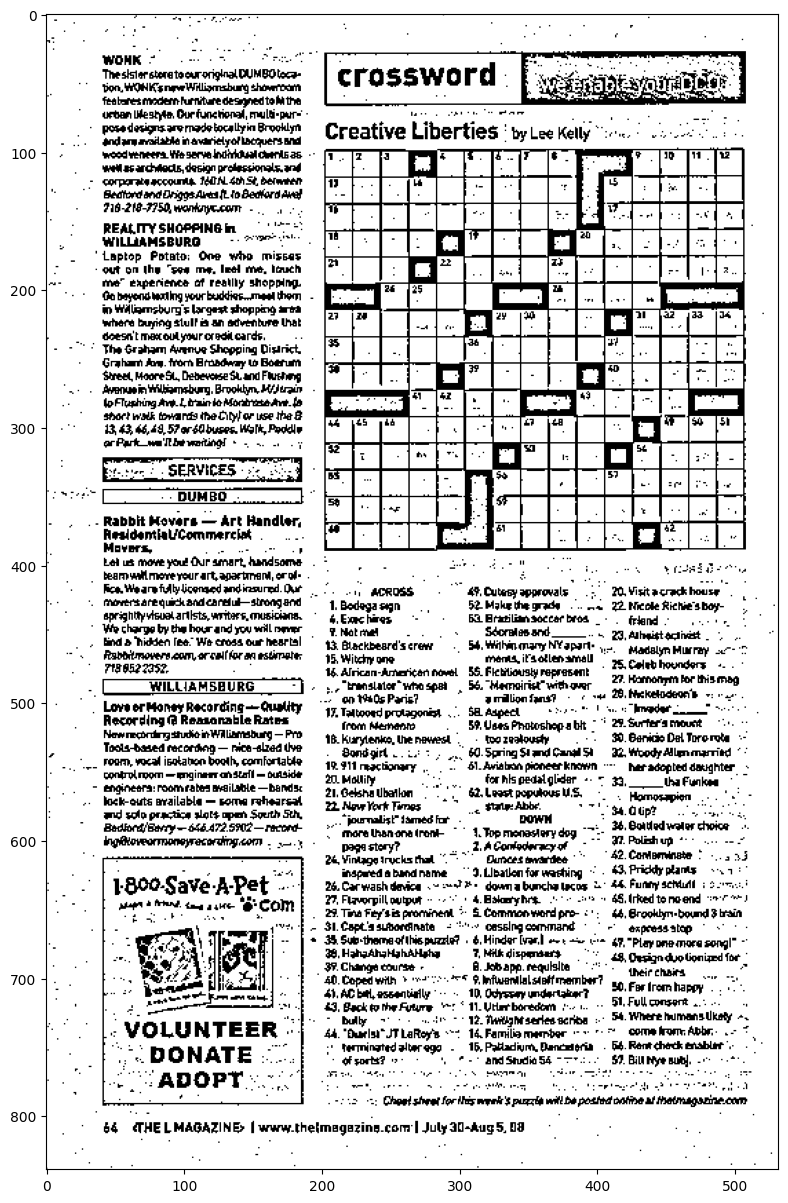

In [121]:
cw_2_adapt = cv2.adaptiveThreshold(crossword, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
show_pic(cw_2_adapt)

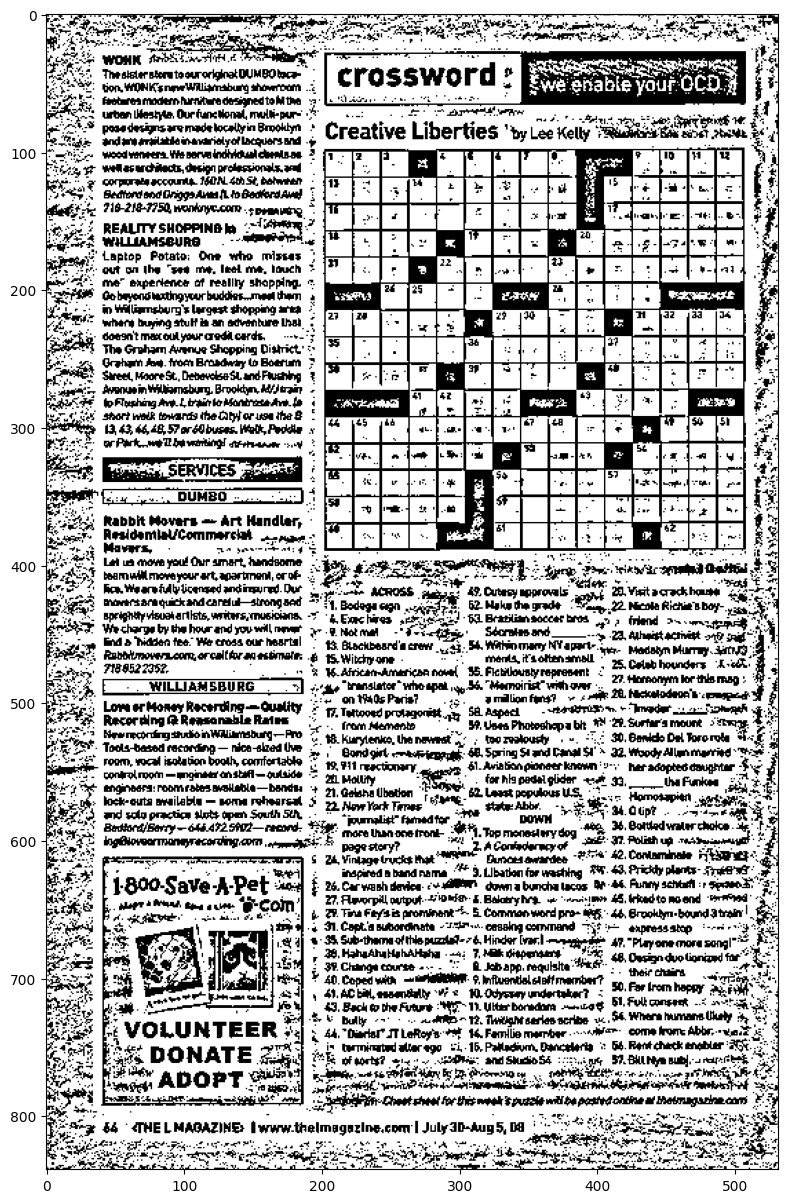

In [122]:
cw_2 = cv2.adaptiveThreshold(crossword, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
show_pic(cw_2)

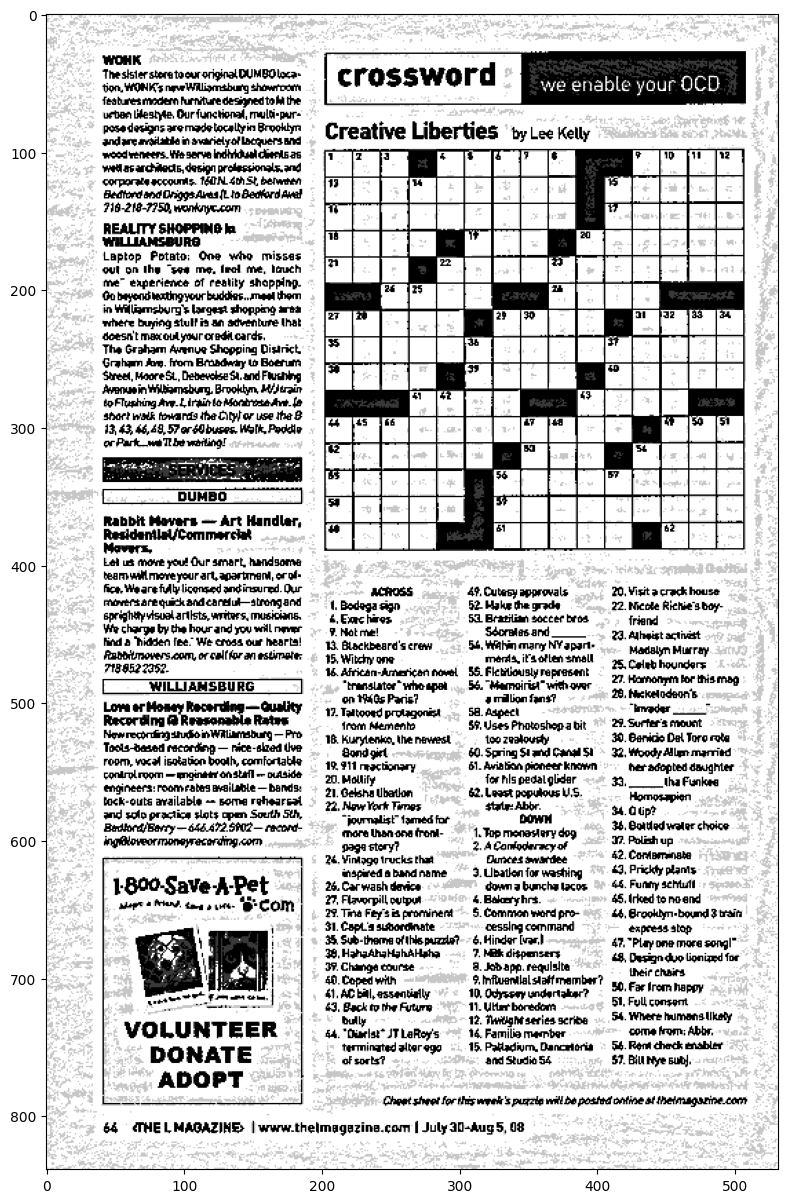

In [126]:
# We can blend 2 thresholds together to get target for best result
cw_blended = cv2.addWeighted(src1=cw_1, alpha=0.7, src2=cw_2, beta=0.2, gamma=0)
show_pic(cw_blended)
# This is probably the best blend.

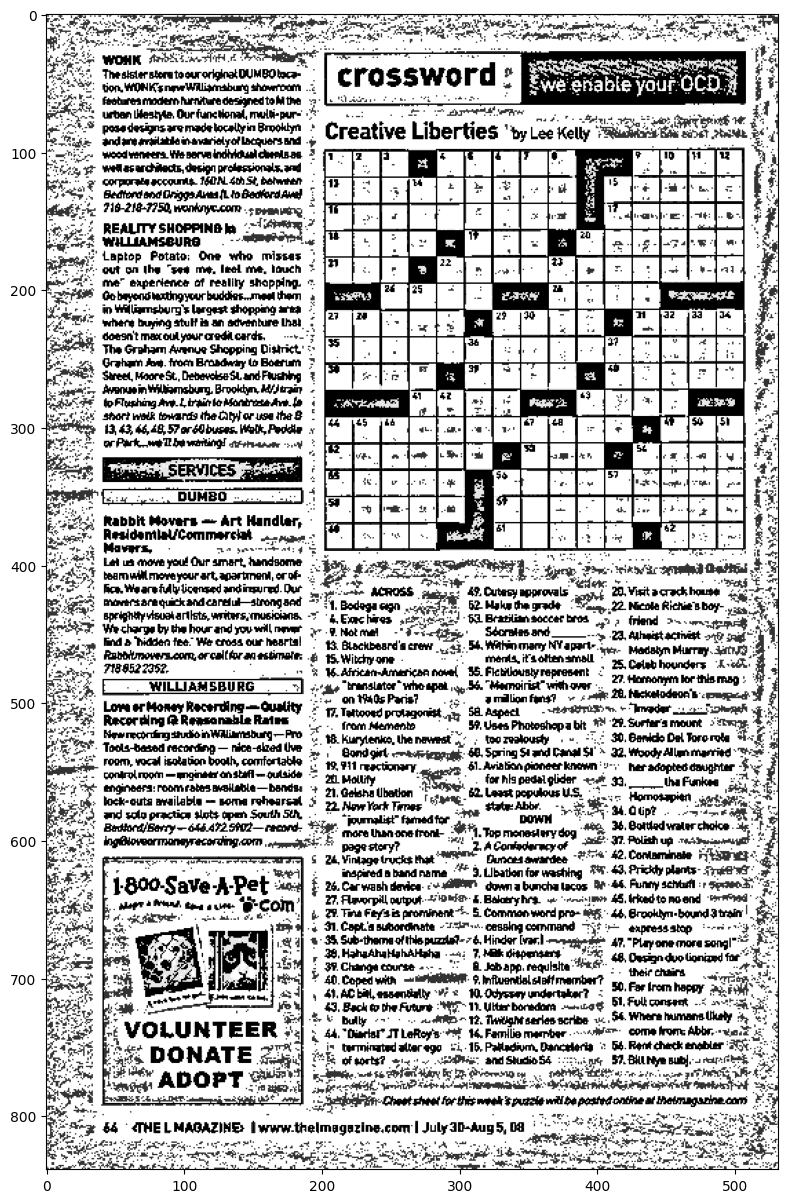

In [124]:
cw_blended2 = cv2.addWeighted(src1=cw_1, alpha=0.2, src2=cw_2, beta=0.9, gamma=0)
show_pic(cw_blended2)

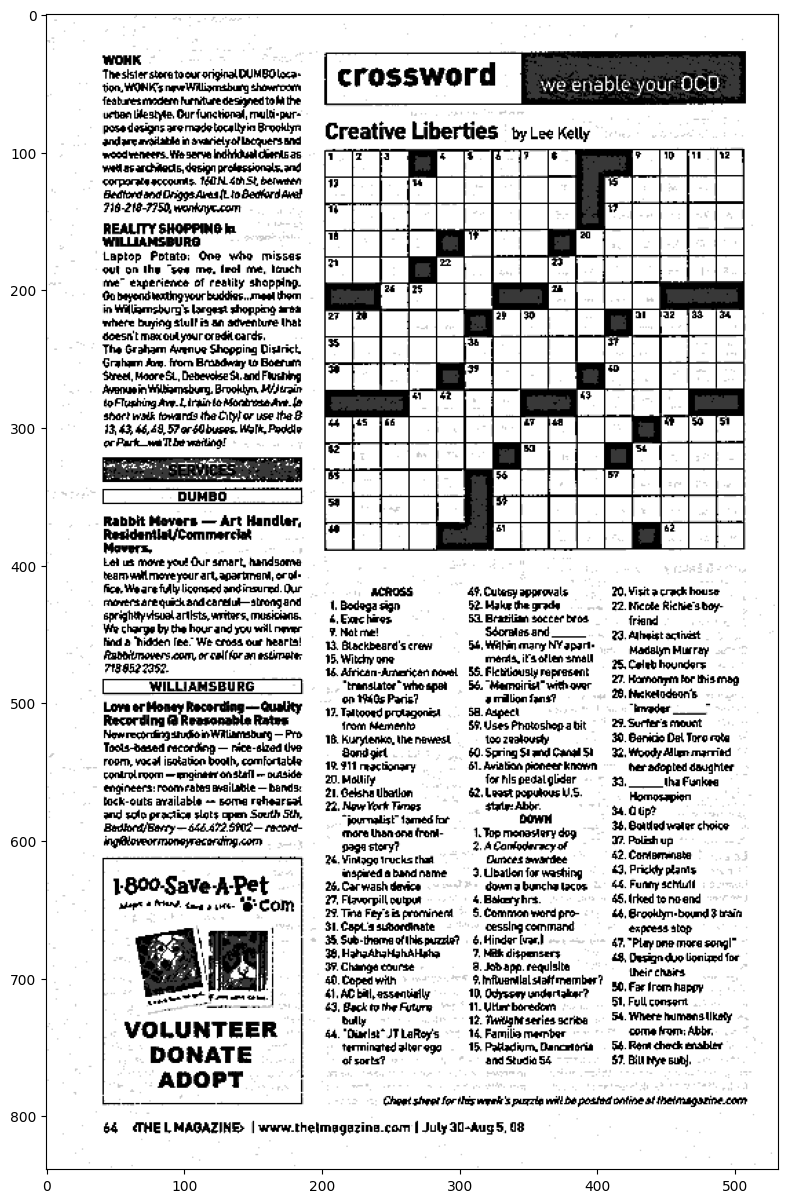

In [125]:
cw_blended3 = cv2.addWeighted(src1=cw_1, alpha=0.7, src2=cw_2_adapt, beta=0.2, gamma=0)
show_pic(cw_blended3)